In [64]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
%matplotlib inline
import seaborn as sns
from scipy import stats
from scipy.stats import norm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:

train = pd.read_csv('train_users_2.csv',na_values=[" ","NA","NAN","-unknown-",""])#we consired this also our na values


In [3]:
#train.head(20)
train.info()
train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
id                         213451 non-null object
date_account_created       213451 non-null object
timestamp_first_active     213451 non-null int64
date_first_booking         88908 non-null object
gender                     117763 non-null object
age                        125461 non-null float64
signup_method              213451 non-null object
signup_flow                213451 non-null int64
language                   213451 non-null object
affiliate_channel          213451 non-null object
affiliate_provider         213451 non-null object
first_affiliate_tracked    207386 non-null object
signup_app                 213451 non-null object
first_device_type          213451 non-null object
first_browser              186185 non-null object
country_destination        213451 non-null object
dtypes: float64(1), int64(2), object(13)
memory usage: 26.1+ MB


,timestamp_first_active,age,signup_flow
count,2.134510e+05,125461.000000,213451.000000
mean,2.013085e+13,49.668335,3.267387
std,9.253717e+09,155.666612,7.637707
min,2.009032e+13,1.000000,0.000000
25%,2.012123e+13,28.000000,0.000000
50%,2.013091e+13,34.000000,0.000000
75%,2.014031e+13,43.000000,0.000000
max,2.014063e+13,2014.000000,25.000000


In [4]:
train.shape
x=train.columns

In [5]:
#drop date_first_booking bcoz it has more than 50% of na values which ll not give any conclusion
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train['country_destination'].count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
date_first_booking,124543,0.583473
gender,95688,0.448290
age,87990,0.412226
first_browser,27266,0.127739
first_affiliate_tracked,6065,0.028414
country_destination,0,0.000000
first_device_type,0,0.000000
signup_app,0,0.000000
affiliate_provider,0,0.000000
affiliate_channel,0,0.000000


In [6]:
for i in x:
    print(i,train[i].value_counts(),'\n')

id bljh514xqr    1
y73beew770    1
zl430be460    1
lpit43xi03    1
a7bz20a93m    1
qrh57xse85    1
xng5go76fk    1
ijo6lw3lf0    1
06cpb5sogj    1
fhjg5rslo3    1
5tgmttlz7e    1
xw9he6iq16    1
l3cpq8qadw    1
l0i9ssu961    1
5w6nd2udwc    1
3yez8sxjem    1
n0y5ywckh4    1
gsc9pngzr0    1
a4w88sgjdh    1
nf670kyz8a    1
namr51yn8s    1
jaqyev28fx    1
3ke973l3j3    1
vflqz8qxvd    1
kkzila8hoh    1
fq7l5qmyqo    1
xc2b15viqn    1
bijh3gzx86    1
u3c6b0438s    1
qx6tn0h0kh    1
             ..
zsn5vzfh0g    1
7ojggwp3k0    1
0uuyk6lyqh    1
an6oylx816    1
yiiq897fpz    1
cco6gzecph    1
l3ajvyspho    1
c56hrdivjf    1
04dmz63orw    1
ltyadtks4s    1
vxm40i8fuo    1
ecu8z8naqf    1
f3n2pqahe1    1
749x3gn1r2    1
7deibez05t    1
oedfq62ysn    1
cfd2mijrm9    1
8d204ge22u    1
l8zd5oqzk6    1
alna274q1b    1
e2ydb8j04t    1
i6g2cxpw26    1
f7gbpmfbqd    1
10ejmdu4uz    1
0wzbi5dy37    1
u7adjukic9    1
zuteqcbkiw    1
qtooo0iiyy    1
gwaawd6efs    1
caq4kyw31c    1
Name: id, Length: 213

In [7]:
train.drop(['id'],axis=1,inplace=True)

In [8]:
train.shape

(213451, 15)

In [9]:
train['age'].value_counts()

30.0      6124
31.0      6016
29.0      5963
28.0      5939
32.0      5855
27.0      5738
33.0      5527
26.0      5044
34.0      5029
35.0      4860
25.0      4459
36.0      4083
37.0      3694
38.0      3384
24.0      3220
39.0      2998
40.0      2766
41.0      2538
23.0      2462
42.0      2243
45.0      2149
44.0      2137
43.0      2056
46.0      1875
22.0      1702
47.0      1646
48.0      1469
50.0      1387
51.0      1337
49.0      1331
          ... 
91.0        12
97.0        10
15.0         8
2.0          7
113.0        4
1931.0       3
4.0          3
1949.0       3
1932.0       3
1924.0       2
1936.0       2
1947.0       2
1929.0       2
1928.0       2
1.0          2
111.0        2
1935.0       1
1926.0       1
1995.0       1
1927.0       1
2008.0       1
1953.0       1
132.0        1
150.0        1
1925.0       1
1933.0       1
1942.0       1
112.0        1
1938.0       1
1952.0       1
Name: age, Length: 127, dtype: int64

In [10]:
train.drop(['date_first_booking'],axis=1,inplace=True)#drop this has many na

In [11]:
train.shape

(213451, 14)

In [12]:
train.describe()
train['gender'].value_counts()

FEMALE    63041
MALE      54440
OTHER       282
Name: gender, dtype: int64

In [13]:
#gender col has 44% na value so we have to fill with something using mean,mode,median or randomly. here we use randomly assign one value b/w male or female
x=['MALE','FEMALE']
train['gender'].fillna(np.random.choice(x),inplace=True)

In [14]:
train['gender'].value_counts()

MALE      150128
FEMALE     63041
OTHER        282
Name: gender, dtype: int64

In [15]:
round(np.mean(train['age'].loc[train['age'].notnull()]))#mean of age/total value(excluding na)
train['age'] = train['age'].fillna(50)#fill nas wid mean

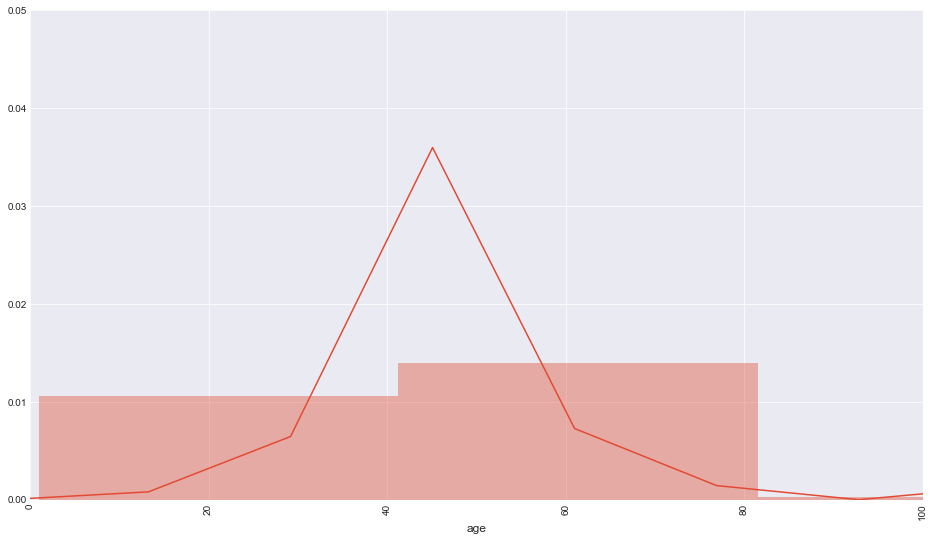

In [16]:
#see outliers(seen b4 18 and after 90 so we have to replace wid nan in nxt cell after graph)
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
pd.set_option("display.max_rows",16)
sns.set_style("darkgrid")
plt.xticks(rotation=90)
sns.distplot(train.age,bins=50)

plt.axis([0,100,0,0.05])
plt.show()

In [17]:
#function to assign outliers wid nan values
def outlier_detection(df,column,min,max):
    col_values=train[column].values
    train[column]=np.where(np.logical_or(col_values<=min,col_values>=max),np.NaN,col_values)
    
outlier_detection(train,'age',18,90)

In [18]:
#mean of value b/w 18 to 90
round(np.mean(train['age'].loc[train['age'].notnull()]))

42

In [19]:
train['age'] = train['age'].fillna(42)#fill nas wid mean

In [20]:
train['age'].isnull().sum()

0

In [21]:
train['first_browser'].value_counts()
train['first_browser'].isnull().sum()#here null values is 27266

27266

In [22]:
train['first_browser'] = train['first_browser'].fillna('other')

In [23]:
train['first_browser'].isnull().sum()#here no null value

0

In [24]:
train['first_browser'].value_counts()

Chrome             63845
Safari             45169
Firefox            33655
other              27266
IE                 21068
Mobile Safari      19274
Chrome Mobile       1270
Android Browser      851
                   ...  
Epic                   1
Googlebot              1
Kindle Browser         1
Google Earth           1
Arora                  1
PS Vita browser        1
IceDragon              1
Stainless              1
Name: first_browser, Length: 52, dtype: int64

In [25]:
train['first_affiliate_tracked'].value_counts()
train['first_affiliate_tracked'].isnull().sum()#here null values is 6065

6065

In [26]:
train['first_affiliate_tracked'] = train['first_affiliate_tracked'].fillna('untracked')#we fill this col wid most frequently occured value 'untracked

In [27]:
train['first_affiliate_tracked'].isnull().sum()# here there is no null values

0

In [28]:
train['first_affiliate_tracked'].value_counts()
print("all nan values are filled")

all nan values are filled


In [29]:
train.head()

,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,2010-06-28,20090319043255,MALE,50.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,2011-05-25,20090523174809,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,2010-09-28,20090609231247,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,2011-12-05,20091031060129,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,2010-09-14,20091208061105,MALE,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [30]:
train['date_account_created']=pd.to_datetime(train['date_account_created'])
train['timestamp_first_active']=pd.to_datetime(train['timestamp_first_active'])

#train.info()

In [31]:
train['day_account_created']=train['date_account_created'].dt.weekday
train['year_account_created']=train['date_account_created'].dt.year
train['month_account_created']=train['date_account_created'].dt.month
train['quarter_account_created']=train['date_account_created'].dt.quarter

In [32]:
train['day_first_active']=train['timestamp_first_active'].dt.weekday
train['year_first_active']=train['timestamp_first_active'].dt.year
train['month_first_active']=train['timestamp_first_active'].dt.month
train['quarter_first_active']=train['timestamp_first_active'].dt.quarter
train['hour_first_active']=train['timestamp_first_active'].dt.hour

In [33]:
train.head()

,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,...,country_destination,day_account_created,year_account_created,month_account_created,quarter_account_created,day_first_active,year_first_active,month_first_active,quarter_first_active,hour_first_active
0,2010-06-28,1970-01-01 05:34:50.319043255,MALE,50.0,facebook,0,en,direct,direct,untracked,...,NDF,0,2010,6,2,3,1970,1,1,5
1,2011-05-25,1970-01-01 05:34:50.523174809,MALE,38.0,facebook,0,en,seo,google,untracked,...,NDF,2,2011,5,2,3,1970,1,1,5
2,2010-09-28,1970-01-01 05:34:50.609231247,FEMALE,56.0,basic,3,en,direct,direct,untracked,...,US,1,2010,9,3,3,1970,1,1,5
3,2011-12-05,1970-01-01 05:34:51.031060129,FEMALE,42.0,facebook,0,en,direct,direct,untracked,...,other,0,2011,12,4,3,1970,1,1,5
4,2010-09-14,1970-01-01 05:34:51.208061105,MALE,41.0,basic,0,en,direct,direct,untracked,...,US,1,2010,9,3,3,1970,1,1,5


In [34]:
train.drop(['timestamp_first_active'],axis=1,inplace=True)
train.drop(['date_account_created'],axis=1,inplace=True)

In [35]:
train.head(30)

,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,...,country_destination,day_account_created,year_account_created,month_account_created,quarter_account_created,day_first_active,year_first_active,month_first_active,quarter_first_active,hour_first_active
0,MALE,50.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,...,NDF,0,2010,6,2,3,1970,1,1,5
1,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,...,NDF,2,2011,5,2,3,1970,1,1,5
2,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,...,US,1,2010,9,3,3,1970,1,1,5
3,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,...,other,0,2011,12,4,3,1970,1,1,5
4,MALE,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,...,US,1,2010,9,3,3,1970,1,1,5
5,MALE,50.0,basic,0,en,other,other,omg,Web,Mac Desktop,...,US,4,2010,1,1,3,1970,1,1,5
6,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,...,US,5,2010,1,1,3,1970,1,1,5
7,FEMALE,47.0,basic,0,en,direct,direct,omg,Web,Mac Desktop,...,US,6,2010,1,1,3,1970,1,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22,MALE,40.0,basic,0,en,seo,google,untracked,Web,iPhone,...,US,0,2010,1,1,3,1970,1,1,5


In [36]:
#tfa=np.vstack(train.timestamp_first_active.astype(str).apply(lambda x:list(map(int,[x[:4],x[4:6],x[6:8],x[10:12],x[12:14]]))).values)

In [37]:
#train['tfa-year']=tfa[:0]
#train['tfa-month']=tfa[:1]

In [38]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 21 columns):
gender                     213451 non-null object
age                        213451 non-null float64
signup_method              213451 non-null object
signup_flow                213451 non-null int64
language                   213451 non-null object
affiliate_channel          213451 non-null object
affiliate_provider         213451 non-null object
first_affiliate_tracked    213451 non-null object
signup_app                 213451 non-null object
first_device_type          213451 non-null object
first_browser              213451 non-null object
country_destination        213451 non-null object
day_account_created        213451 non-null int64
year_account_created       213451 non-null int64
month_account_created      213451 non-null int64
quarter_account_created    213451 non-null int64
day_first_active           213451 non-null int64
year_first_active          213451 non-null i

In [39]:
train['signup_flow'].value_counts()#it is also a categorical value

0     164739
25     14659
12      9329
3       8822
2       6881
24      4328
23      2835
1       1047
       ...  
8        240
21       196
5         36
20        14
16        11
15        10
10         2
4          1
Name: signup_flow, Length: 17, dtype: int64

In [40]:
features=['gender','signup_method','language','affiliate_channel','affiliate_provider','first_affiliate_tracked','signup_app','first_device_type','first_browser','signup_flow']

In [41]:
dummies=pd.get_dummies(train[features])

In [42]:
for i in features:
    train.drop([i],axis=1,inplace=True)

In [43]:
train.shape


(213451, 11)

In [44]:
frame=[train,dummies]
new_df=pd.concat(frame,axis=1)

In [45]:
new_df.columns
new_df=new_df[new_df['country_destination'] != 'NDF']

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
x=new_df.drop('country_destination',axis=1)#x is i/p features as we drop the target col
y=new_df['country_destination']#y is o/p as here only the target col
validation_size=0.2
seed=7
x_train, X_test, y_train, Y_test = train_test_split(x, y, test_size=validation_size, random_state=seed)

In [47]:
clf=RandomForestClassifier()
clf=clf.fit(x_train,y_train)

In [48]:
predictions=(clf.predict(X_test))
predictions

array(['US', 'US', 'US', ..., 'US', 'US', 'US'], dtype=object)

In [49]:
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report
print(accuracy_score(Y_test,predictions))

0.6253514790237319


In [58]:
models=[]
models.append(('RF',RandomForestClassifier()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('LG',LogisticRegression()))
models.append(('DT',DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SV',SVC()))
#models.append(('XGB',XGBClassifier()))// from xgboost.sklearn import XGBClassifier()
models.append(('GB',GradientBoostingClassifier()))
models

[('RF',
  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
              max_depth=None, max_features='auto', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
              oob_score=False, random_state=None, verbose=0,
              warm_start=False)),
 ('KNN',
  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
             metric_params=None, n_jobs=1, n_neighbors=5, p=2,
             weights='uniform')),
 ('LG',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
            penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
            verbose=0, warm_start=False)),
 ('DT',
  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
     

In [66]:
results=[]
names=[]
for name,model in models:
    kfold=model_selection.KFold(n_splits=2,random_state=7)
    cv_results=model_selection.cross_val_score(model,x_train,y_train,cv=kfold)
    results.append(cv_results)
    names.append(name)
    print(name,cv_results.mean()*100,cv_results.std)#mean and standard deviation

RF 63.227230548603885 <built-in method std of numpy.ndarray object at 0x0000005839E8A9E0>
KNN 66.14458847678767 <built-in method std of numpy.ndarray object at 0x0000005839E8AC10>
LG 70.19936450805614 <built-in method std of numpy.ndarray object at 0x0000005839E8A8A0>
DT 49.212664848297386 <built-in method std of numpy.ndarray object at 0x0000005839E8AA30>
NB 0.4836487360458904 <built-in method std of numpy.ndarray object at 0x0000005837138120>
SV 70.19936450805614 <built-in method std of numpy.ndarray object at 0x0000005839E8A7B0>
GB 70.0587689452521 <built-in method std of numpy.ndarray object at 0x0000005837161F30>


In [ ]:
fig=plt.figure()
fig.suptitle('algorithm comparision')
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()